# Pregunta de investigación

¿Podemos, a partir de la composición química de una tinta, predecir la compatibilidad de dicha tinta sobre un material concreto?

# Carga de datos

In [209]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
# Cargamos las tablas 

# Tabla que contiene los resultados de compatibilidad entre las tintas de HP y varios materiales. Los valores oscilan entre 0 (totalmente compatible) y 1 (totalmente incompatible).
testing_hp = pd.read_csv('./Testing_HP_dot.csv', sep = ';')

# Tabla que contiene la formulación de las tintas de HP
ink_formulation = pd.read_csv('./Ink_formulation_dot.csv', sep = ';')

In [3]:
print("Columns in testing_hp:", testing_hp.columns)
print("ink_formulation:", ink_formulation.columns)

Columns in testing_hp: Index(['Ink_ID', 'COMP_HDPE', 'COMP_PA', 'COMP_PVC', 'COMP_PE', 'COMP_POM',
       'COMP_SAN', 'COMP_PC', 'COMP_PET', 'COMP_PEI'],
      dtype='object')
ink_formulation: Index(['Ink_ID', 'Technology', 'Ink_type', 'Solvent A', 'Solvent B',
       'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive'],
      dtype='object')


In [4]:
testing_hp.head()

,Ink_ID,COMP_HDPE,COMP_PA,COMP_PVC,COMP_PE,COMP_POM,COMP_SAN,COMP_PC,COMP_PET,COMP_PEI
0,1,0.987995,0.877936,0.464226,NaN,0.061516,0.856189,0.880708,0.872157,NaN
1,2,0.928220,0.335293,0.772923,0.647043,0.243741,0.350888,0.281069,0.972229,0.942954
2,3,0.536732,NaN,0.657949,0.905591,0.964519,0.153753,0.868830,0.445847,0.559376
3,4,0.431773,0.152819,NaN,0.495876,NaN,0.721962,NaN,0.640412,0.461460
4,5,NaN,0.444026,0.024186,NaN,0.590682,0.326098,0.328672,0.821611,NaN


In [5]:
ink_formulation.head()

,Ink_ID,Technology,Ink_type,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,2D,DesignJet,0.7250,0.0500,0.0650,0.010,0.0750,0.000,0.0750
1,2,2D,DesignJet,0.4815,0.1845,0.0350,0.002,0.1485,0.000,0.1485
2,3,2D,DesignJet,0.5644,0.1000,0.1114,0.015,0.1025,0.000,0.1067
3,4,2D,Latex_G4,0.6250,0.1700,0.0620,0.020,0.0000,0.022,0.1010
4,5,2D,Latex_G3,0.5405,0.1400,0.0600,0.005,0.0750,0.000,0.1795


In [6]:
# Vamos a seleccionar un material de la tabla de "Testing_HP_dot", que se convertirá en nuestra variable objetivo,
# y la vamos a juntar con la tabla de "Ink_formulation_dot" para obtener una única tabla de trabajo. El material seleccionado es el HDPE.
COMP_HDPE = testing_hp[['Ink_ID', 'COMP_HDPE']] 
train_HDPE = pd.merge(COMP_HDPE, ink_formulation, on='Ink_ID')
train_HDPE.head()

,Ink_ID,COMP_HDPE,Technology,Ink_type,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,0.987995,2D,DesignJet,0.7250,0.0500,0.0650,0.010,0.0750,0.000,0.0750
1,2,0.928220,2D,DesignJet,0.4815,0.1845,0.0350,0.002,0.1485,0.000,0.1485
2,3,0.536732,2D,DesignJet,0.5644,0.1000,0.1114,0.015,0.1025,0.000,0.1067
3,4,0.431773,2D,Latex_G4,0.6250,0.1700,0.0620,0.020,0.0000,0.022,0.1010
4,5,NaN,2D,Latex_G3,0.5405,0.1400,0.0600,0.005,0.0750,0.000,0.1795


# Exploración de datos

In [7]:
train_HDPE.columns

Index(['Ink_ID', 'COMP_HDPE', 'Technology', 'Ink_type', 'Solvent A',
       'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B',
       'Additive'],
      dtype='object')

In [8]:
train_HDPE.shape

(21, 11)

In [9]:
train_HDPE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ink_ID      21 non-null     int64  
 1   COMP_HDPE   17 non-null     float64
 2   Technology  21 non-null     object 
 3   Ink_type    21 non-null     object 
 4   Solvent A   21 non-null     float64
 5   Solvent B   21 non-null     float64
 6   Pigment A   21 non-null     float64
 7   Pigment B   21 non-null     float64
 8   Resin A     21 non-null     float64
 9   Resin B     21 non-null     float64
 10  Additive    21 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.9+ KB


In [10]:
train_HDPE.describe()

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
count,21.000000,17.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,11.000000,0.533318,0.562629,0.159581,0.081867,0.013981,0.069543,0.004476,0.107924
std,6.204837,0.325803,0.097500,0.041508,0.050345,0.022833,0.040273,0.015128,0.047690
min,1.000000,0.015209,0.430600,0.050000,0.010000,0.000000,0.000000,0.000000,0.014300
25%,6.000000,0.291655,0.481500,0.140000,0.042900,0.000000,0.060600,0.000000,0.092000
50%,11.000000,0.488917,0.540500,0.170000,0.065000,0.010000,0.075000,0.000000,0.109300
75%,16.000000,0.845246,0.625000,0.184500,0.111100,0.017000,0.095200,0.000000,0.137000
max,21.000000,0.987995,0.765000,0.251400,0.181900,0.105600,0.148500,0.067000,0.179500


Nuestro dataset es ínfimo, por lo que vamos a usar técnicas de data augmentation para obtener nuevos valores a partir de los originales. Pero antes, hemos de eliminar algunas filas de nuestro DataSet. Aunque tengamos muy pocos datos, no podemos llenar los huecos de manera aproximada ya que se trata de la variable objetivo. Hemos de eliminar las filas que no tienen datos sobre compatibilidad química. Una vez creado el modelo, tal vez se puede usar para predecir valores de la variable COMP_HDPE y llenar esos huecos para crear un segundo modelo más preciso.

In [11]:
# Vamos ver como se distribuyen los datos que faltan
train_HDPE[train_HDPE['COMP_HDPE'].isna()]

,Ink_ID,COMP_HDPE,Technology,Ink_type,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
4,5,NaN,2D,Latex_G3,0.5405,0.1400,0.0600,0.0050,0.0750,0.000,0.1795
8,9,NaN,2D,Latex_G4,0.7650,0.1400,0.0100,0.0225,0.0000,0.005,0.0575
13,14,NaN,2D,Stitch,0.4306,0.2514,0.1033,0.1056,0.0052,0.000,0.1039
16,17,NaN,3D,Plastic_jet,0.5250,0.1500,0.0750,0.0000,0.0750,0.000,0.1750


# Procesamiento de datos

In [12]:
# Eliminamos las filas que no contienen datos sobre compatibilidad química del HDPE (COMP_HDPE).

Ink_IDs_to_delete = [5, 9, 14, 17]
train_HDPE_final = train_HDPE[~train_HDPE['Ink_ID'].isin(Ink_IDs_to_delete)]
train_HDPE_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 20
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ink_ID      17 non-null     int64  
 1   COMP_HDPE   17 non-null     float64
 2   Technology  17 non-null     object 
 3   Ink_type    17 non-null     object 
 4   Solvent A   17 non-null     float64
 5   Solvent B   17 non-null     float64
 6   Pigment A   17 non-null     float64
 7   Pigment B   17 non-null     float64
 8   Resin A     17 non-null     float64
 9   Resin B     17 non-null     float64
 10  Additive    17 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
# A continuación eliminamos las columnas no numéricas que no aportan información útil a nuestro modelo

train_HDPE_reduced = train_HDPE_final.copy()
train_HDPE_reduced.drop(['Technology', 'Ink_type'], axis=1, inplace=True)

In [14]:
# Ya podemos ampliar nuestros datos. Lo haremos mediante noise injection.

def noise_injection(X, noise_level=0.1):
    new_ink_id = X['Ink_ID'].max() + 1 + np.arange(X.shape[0])
    X_new = pd.DataFrame({'Ink_ID': new_ink_id})
    
# Añadimos ruido a la variable COMP_HDPE, asegurándonos que los valores esten entre 0 y 1.
    noisy_comp_hdpe = X['COMP_HDPE'] + np.random.normal(0, noise_level, X.shape[0])
    noisy_comp_hdpe = np.where(np.isnan(noisy_comp_hdpe), X['COMP_HDPE'], noisy_comp_hdpe) 
    X_new['COMP_HDPE'] = np.clip(noisy_comp_hdpe, 0, 1)
    
# Añadimos ruido a las columnas que contienen la formulación de las tintas, teniendo en cuenta que no pueden tomar valores negativos y que la suma de todas estas celdas en una
# misma fila ha de ser igual a 1, ya que se son valores de concentración relativa.    
    concentration_cols = ['Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']
    noisy_concentrations = X[concentration_cols].values + np.random.normal(0, noise_level, X[concentration_cols].shape)
    noisy_concentrations = np.clip(noisy_concentrations, 0, None)
    row_sums = noisy_concentrations.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1
    noisy_concentrations = noisy_concentrations / row_sums
    X_new[concentration_cols] = noisy_concentrations
    
    return X_new

# Finalmente aumentamos nuestro data set
train_HDPE_reduced_augmented = train_HDPE_reduced.copy()

while train_HDPE_reduced_augmented.shape[0] < 100:
    noisy_data = noise_injection(train_HDPE_reduced)
    train_HDPE_reduced_augmented = pd.concat((train_HDPE_reduced_augmented, noisy_data), axis=0, ignore_index=True)

print(train_HDPE_reduced_augmented.shape)

(102, 9)


In [15]:
train_HDPE_reduced_augmented.head(40)

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,0.987995,0.725000,0.050000,0.065000,0.010000,0.075000,0.000000,0.075000
1,2,0.928220,0.481500,0.184500,0.035000,0.002000,0.148500,0.000000,0.148500
2,3,0.536732,0.564400,0.100000,0.111400,0.015000,0.102500,0.000000,0.106700
3,4,0.431773,0.625000,0.170000,0.062000,0.020000,0.000000,0.022000,0.101000
4,6,0.127330,0.680200,0.195100,0.040200,0.017000,0.053200,0.000000,0.014300
5,7,0.888952,0.576200,0.141400,0.033300,0.030000,0.076200,0.000000,0.142900
6,8,0.845246,0.461000,0.181800,0.171800,0.013500,0.060700,0.000000,0.111200
7,10,0.015209,0.681500,0.185200,0.011100,0.010000,0.074100,0.000000,0.038100
8,11,0.897710,0.691200,0.171400,0.042900,0.015000,0.065200,0.000000,0.014300
9,12,0.455094,0.540500,0.140000,0.060000,0.018000,0.000000,0.067000,0.174500


Podemos observar que las nuevas filas tiene un Ink_ID que deja de seguir el orden númerico a partir del "Ink_ID" = 38. 

In [16]:
train_HDPE_reduced.head(40)

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,0.987995,0.7250,0.0500,0.0650,0.0100,0.0750,0.000,0.0750
1,2,0.928220,0.4815,0.1845,0.0350,0.0020,0.1485,0.000,0.1485
2,3,0.536732,0.5644,0.1000,0.1114,0.0150,0.1025,0.000,0.1067
3,4,0.431773,0.6250,0.1700,0.0620,0.0200,0.0000,0.022,0.1010
5,6,0.127330,0.6802,0.1951,0.0402,0.0170,0.0532,0.000,0.0143
6,7,0.888952,0.5762,0.1414,0.0333,0.0300,0.0762,0.000,0.1429
7,8,0.845246,0.4610,0.1818,0.1718,0.0135,0.0607,0.000,0.1112
9,10,0.015209,0.6815,0.1852,0.0111,0.0100,0.0741,0.000,0.0381
10,11,0.897710,0.6912,0.1714,0.0429,0.0150,0.0652,0.000,0.0143
11,12,0.455094,0.5405,0.1400,0.0600,0.0180,0.0000,0.067,0.1745


Sí comparamos el dataset original y el aumentado, podemos ver que las primeras filas del dataset aumentado son las mismas que el del original, por lo tanto podemos numerar las nuevas filas (o tintas) a partir de la última fila del dataset original (fila 20).

In [17]:
# Vamos a substituir todos los Ink_IDs generados en el data augmentation por unos nuevos, siguiendo un orden cardinal a partir del valor de la fila 20 (Ink_ID = 25)

start_row = 21
num_rows = len(train_HDPE_reduced_augmented) - start_row

last_value = train_HDPE_reduced_augmented.iloc[start_row - 1, train_HDPE_reduced_augmented.columns.get_loc('Ink_ID')]

new_values = np.arange(last_value + 1, last_value + 1 + num_rows)

train_HDPE_reduced_augmented.iloc[start_row:, train_HDPE_reduced_augmented.columns.get_loc('Ink_ID')] = new_values

Vamos a comprobar que los cambios se han realizado con éxito

In [18]:
train_HDPE_reduced_augmented.head(40)

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
0,1,0.987995,0.725000,0.050000,0.065000,0.010000,0.075000,0.000000,0.075000
1,2,0.928220,0.481500,0.184500,0.035000,0.002000,0.148500,0.000000,0.148500
2,3,0.536732,0.564400,0.100000,0.111400,0.015000,0.102500,0.000000,0.106700
3,4,0.431773,0.625000,0.170000,0.062000,0.020000,0.000000,0.022000,0.101000
4,6,0.127330,0.680200,0.195100,0.040200,0.017000,0.053200,0.000000,0.014300
5,7,0.888952,0.576200,0.141400,0.033300,0.030000,0.076200,0.000000,0.142900
6,8,0.845246,0.461000,0.181800,0.171800,0.013500,0.060700,0.000000,0.111200
7,10,0.015209,0.681500,0.185200,0.011100,0.010000,0.074100,0.000000,0.038100
8,11,0.897710,0.691200,0.171400,0.042900,0.015000,0.065200,0.000000,0.014300
9,12,0.455094,0.540500,0.140000,0.060000,0.018000,0.000000,0.067000,0.174500


In [19]:
train_HDPE_reduced_augmented.tail(10)

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
92,97,0.000000,0.604468,0.131777,0.086343,0.068674,0.000000,0.055233,0.053504
93,98,0.877498,0.577633,0.100903,0.165458,0.000000,0.055639,0.057961,0.042407
94,99,0.490034,0.447398,0.072026,0.033162,0.000000,0.000000,0.025324,0.422089
95,100,0.435476,0.451806,0.015007,0.174493,0.037056,0.060577,0.053444,0.207617
96,101,0.144292,0.429883,0.178574,0.017560,0.132143,0.015740,0.014868,0.211233
97,102,0.389249,0.439694,0.194533,0.206510,0.046795,0.112468,0.000000,0.000000
98,103,0.118258,0.611507,0.105932,0.000000,0.000000,0.080725,0.000000,0.201835
99,104,0.410417,0.504544,0.006500,0.197684,0.104781,0.119542,0.047783,0.019165
100,105,0.613748,0.407986,0.285106,0.034836,0.053978,0.113172,0.049188,0.055733
101,106,0.734208,0.684030,0.116362,0.108977,0.000000,0.009641,0.000000,0.080990


Vemos que la operación se ha realizado con éxito. Ahora vamos a visualizar las diferencias entre el dataframe original y el aumentado.

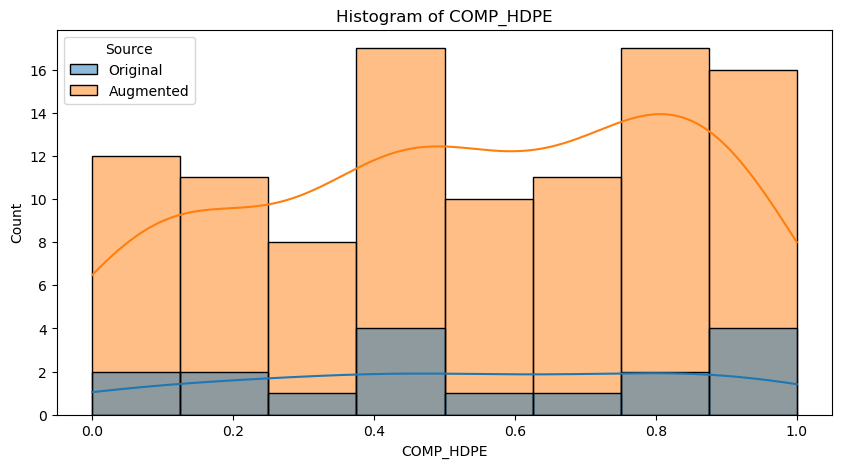

In [215]:
# En este caso vamos a usar un histograma para ver el cambio en la distribución de la variable objetivo "COMP_HDPE"

combined_HDPE = pd.concat([train_HDPE_reduced, train_HDPE_reduced_augmented], keys=['Original', 'Augmented']).reset_index(level=0).rename(columns={'level_0': 'Source'})
plt.figure(figsize=(10, 5))
sns.histplot(data=combined_HDPE, x='COMP_HDPE', hue='Source', kde=True)
plt.title('Histogram of COMP_HDPE')
plt.savefig("Graphs/Hist_after_aug.jpg")
plt.show()

Vemos que la distribución de la variable "COMP_HDPE" es más heterogenia después del aumento de datos. Esto sería un inconveniente en otros casos, ya que se pierden parte de las características del dataframe original, pero en nuestro caso, este incremento en la variabilidad es bueno ya que nuestro dataframe original se ha creade de la nada con números aleatorios y uno de los riesgos que eso conlleva es un dataframe plano y sin patrones.

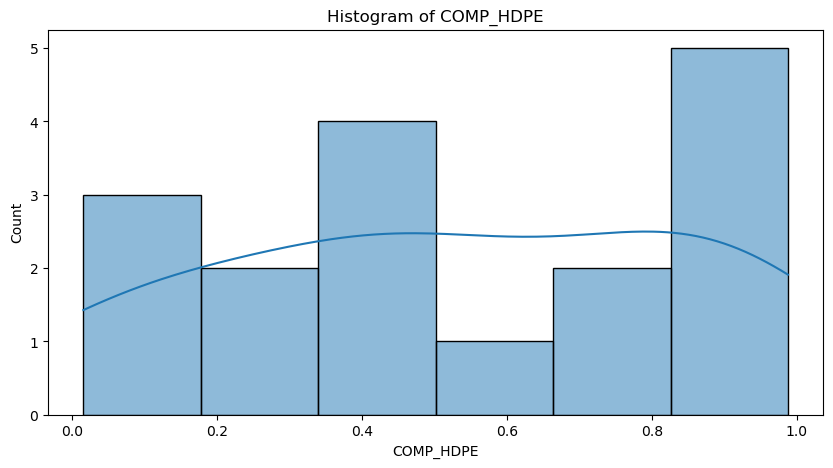

In [214]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_HDPE_reduced, x='COMP_HDPE', kde=True)
plt.title('Histogram of COMP_HDPE')
plt.savefig("Graphs/Hist_org_data.jpg")
plt.show()

En este gráfico podemos ver la distribución del dataframe original con una escala más apropiada para la comparación. Aunque vemos que la distribución no es tan plana como en el gráfico anterior, sí que sigue siendo más homogenea que en el nuevo dataframe. Ahora podemos proseguir con la exploración de datos.

# Exploración de datos (post-augmentation)

In [23]:
train_HDPE_reduced_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ink_ID     102 non-null    int64  
 1   COMP_HDPE  102 non-null    float64
 2   Solvent A  102 non-null    float64
 3   Solvent B  102 non-null    float64
 4   Pigment A  102 non-null    float64
 5   Pigment B  102 non-null    float64
 6   Resin A    102 non-null    float64
 7   Resin B    102 non-null    float64
 8   Additive   102 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 7.3 KB


In [29]:
train_HDPE_reduced_augmented.describe()

,Ink_ID,COMP_HDPE,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,55.156863,0.533108,0.522757,0.146356,0.087565,0.024456,0.082573,0.031413,0.104879
std,30.137883,0.304295,0.112506,0.084630,0.077135,0.037553,0.067685,0.051326,0.074588
min,1.000000,0.000000,0.259309,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.250000,0.297172,0.440349,0.086883,0.019073,0.000000,0.012764,0.000000,0.055336
50%,55.500000,0.535984,0.507556,0.154024,0.069263,0.003906,0.076200,0.000000,0.104728
75%,80.750000,0.818372,0.606061,0.195100,0.141135,0.035583,0.125685,0.052380,0.143022
max,106.000000,1.000000,0.806828,0.366167,0.309541,0.180170,0.251582,0.275022,0.422089


Vemos que tanto 'Pigment B' como 'Resin B' presentant diferencias significativas entre su media y su mediana, por lo que vamos a investigar la presencia de outliers mediante box plots

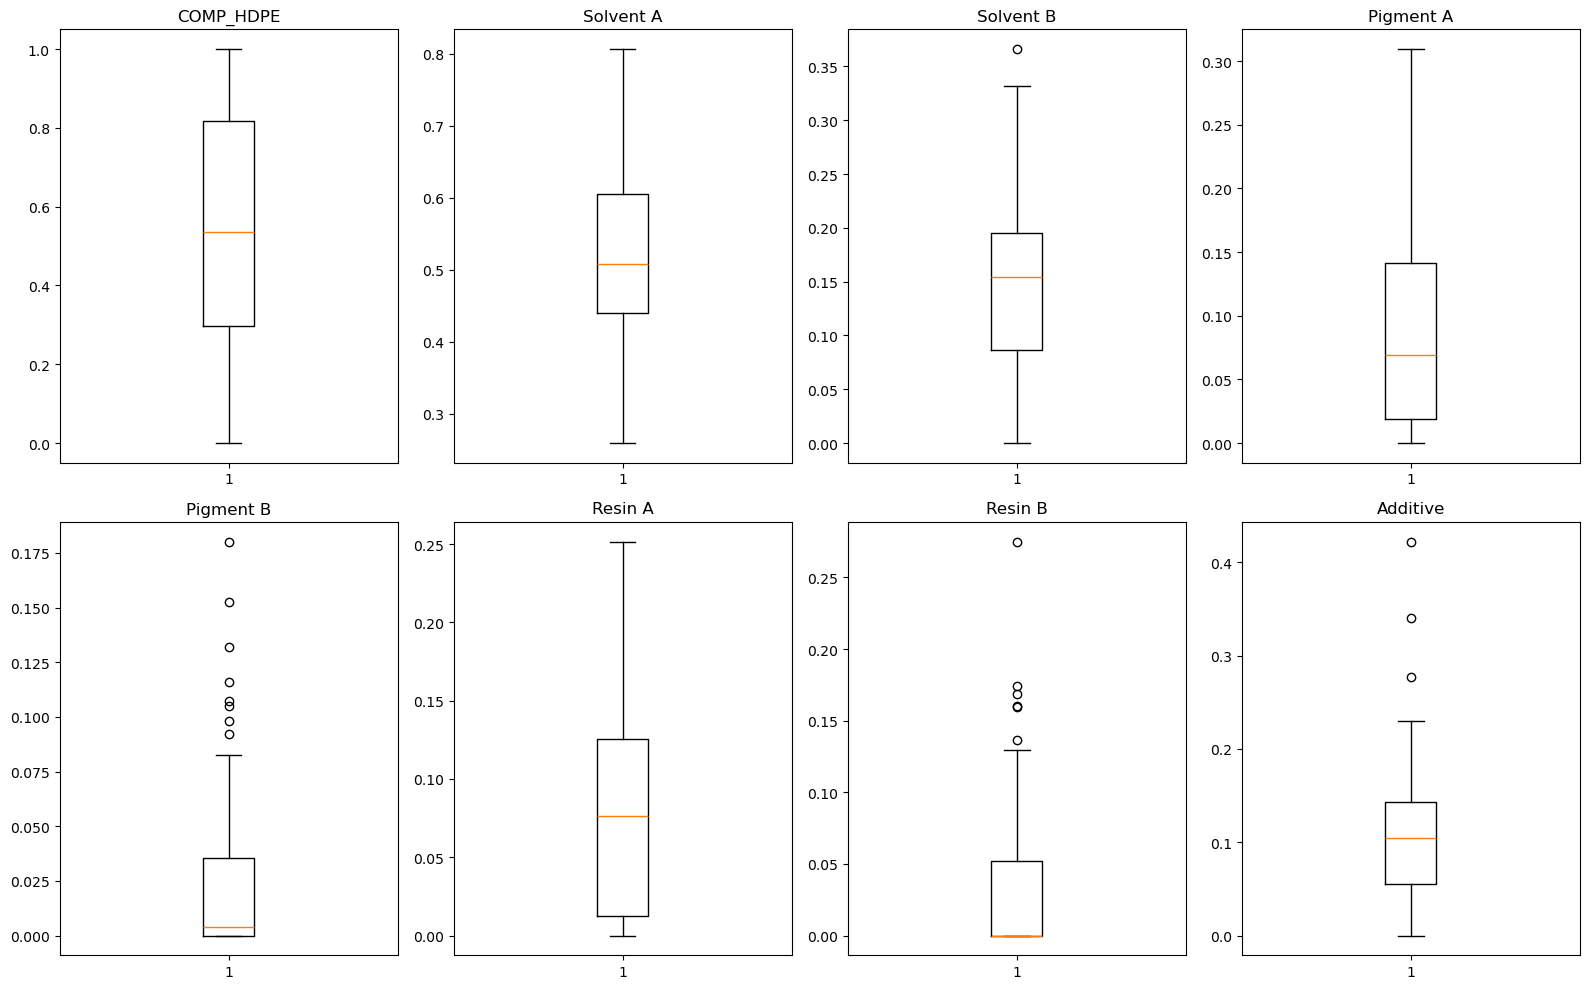

In [212]:
variables = ['COMP_HDPE', 'Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']

fig, ax = plt.subplots(2, 4, figsize=(16, 10))

for i, var in enumerate(variables):
    row = i // 4
    col = i % 4
    ax[row, col].boxplot(train_HDPE_reduced_augmented[var])
    ax[row, col].set_title(var)

plt.tight_layout()
plt.savefig("Graphs/box_plots")
plt.show()

Efectivamente vemos como 'Pigment B' y 'Resin B' presentan multiples outliers, además de estar muy sesgadas hacia la izquierda. Es probable que tengamos que descartar estas variables para construir nuestro modelo. La variable 'Additive' también presenta outliers pero no está tan sesgada, así que puede que nos sea útil. Ahora vamos a usar scatter plots para ver como se relaciona nuestra variable objetivo con las variables de entrada y detectar alguna tendencia.

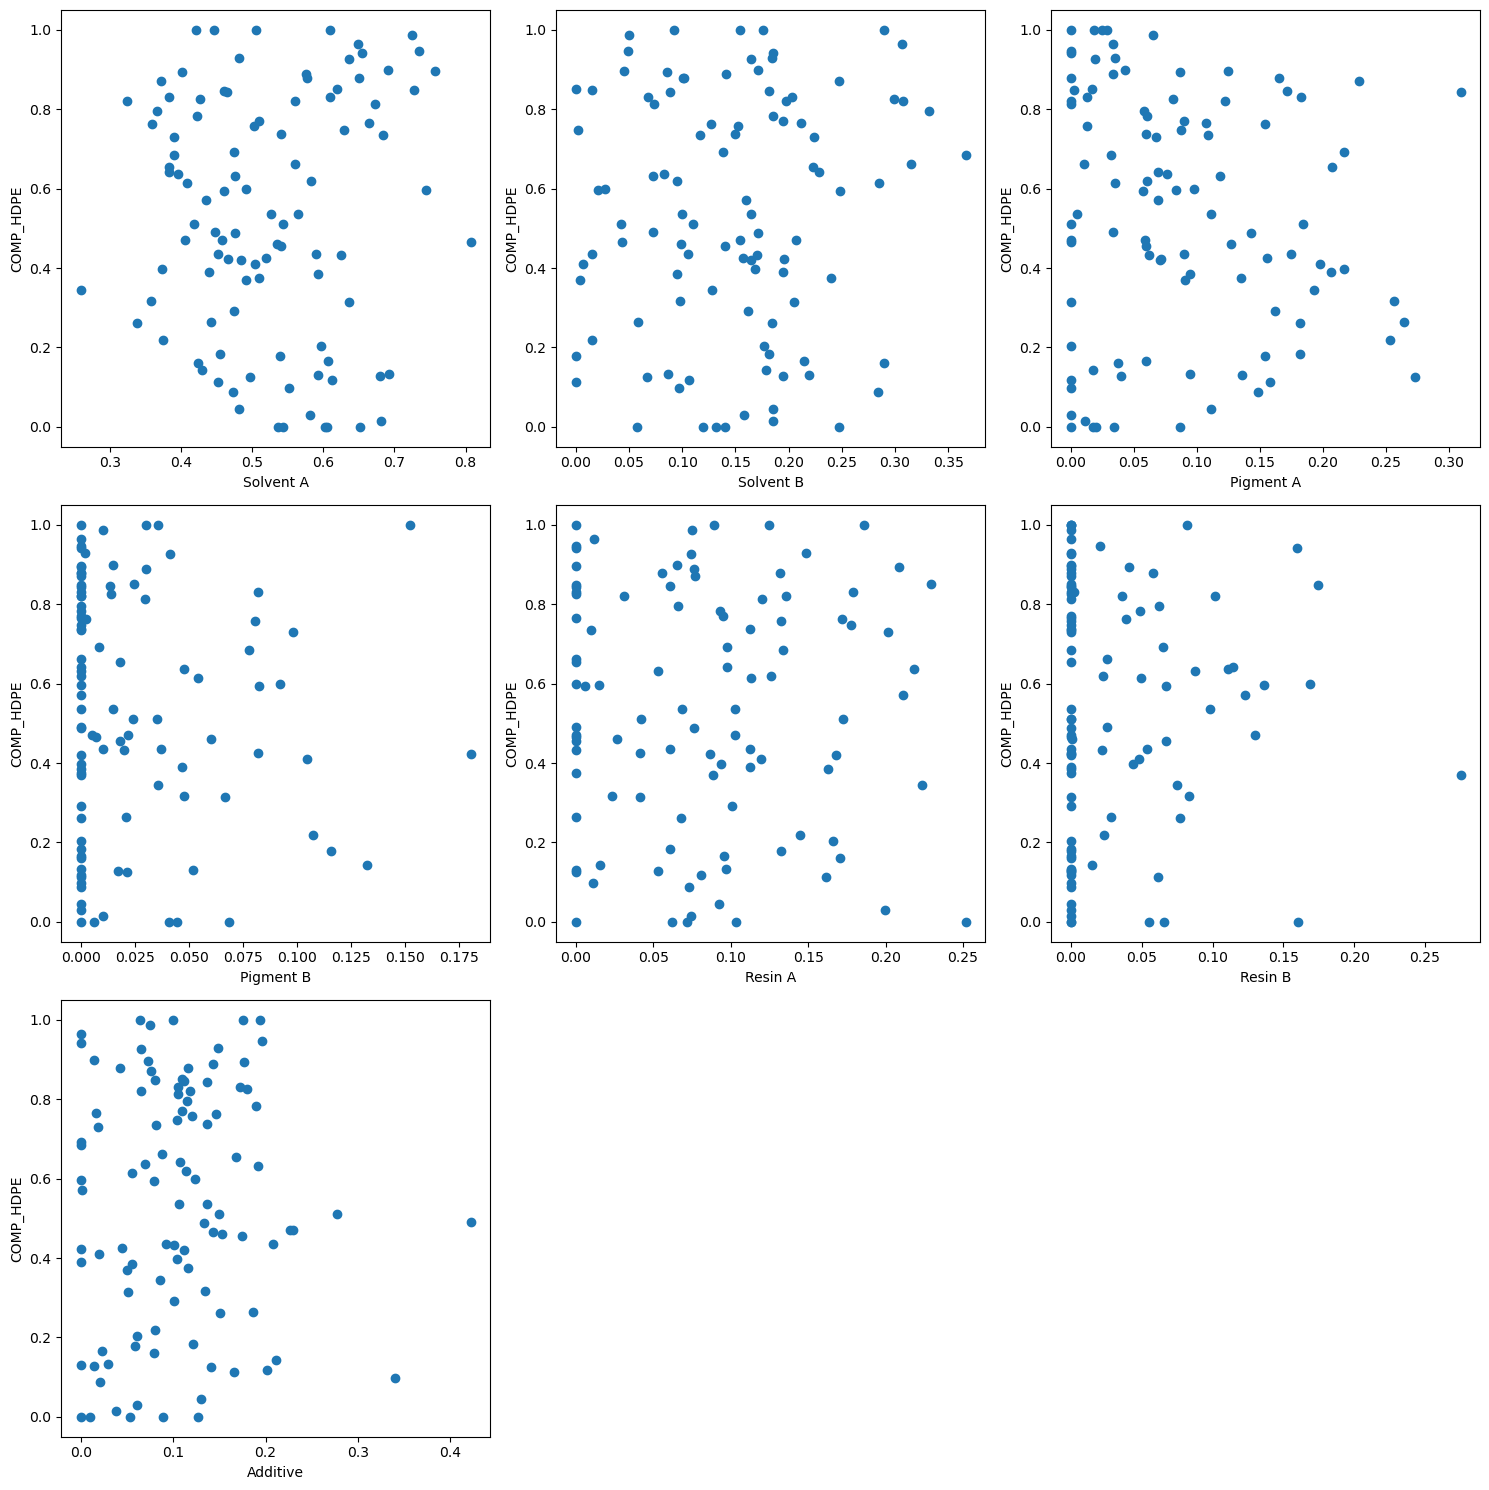

In [216]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

variables = ['Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(train_HDPE_reduced_augmented[var], train_HDPE_reduced_augmented['COMP_HDPE'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('COMP_HDPE')

for ax in axs.flat:
    if not ax.has_data():
        ax.axis('off')

plt.tight_layout()
plt.savefig("Graphs/scatter_aug.jpg")
plt.show()

Estos gráficos muestran que no hay prácticamente ninguna correlación entre las variables de entrada y la objetivo. Aun así, vamos a crear un mapa de calor que muestre la relación entre la variable objetivo y las variables de entrada para acabar de confirmar nuestras sospechas.

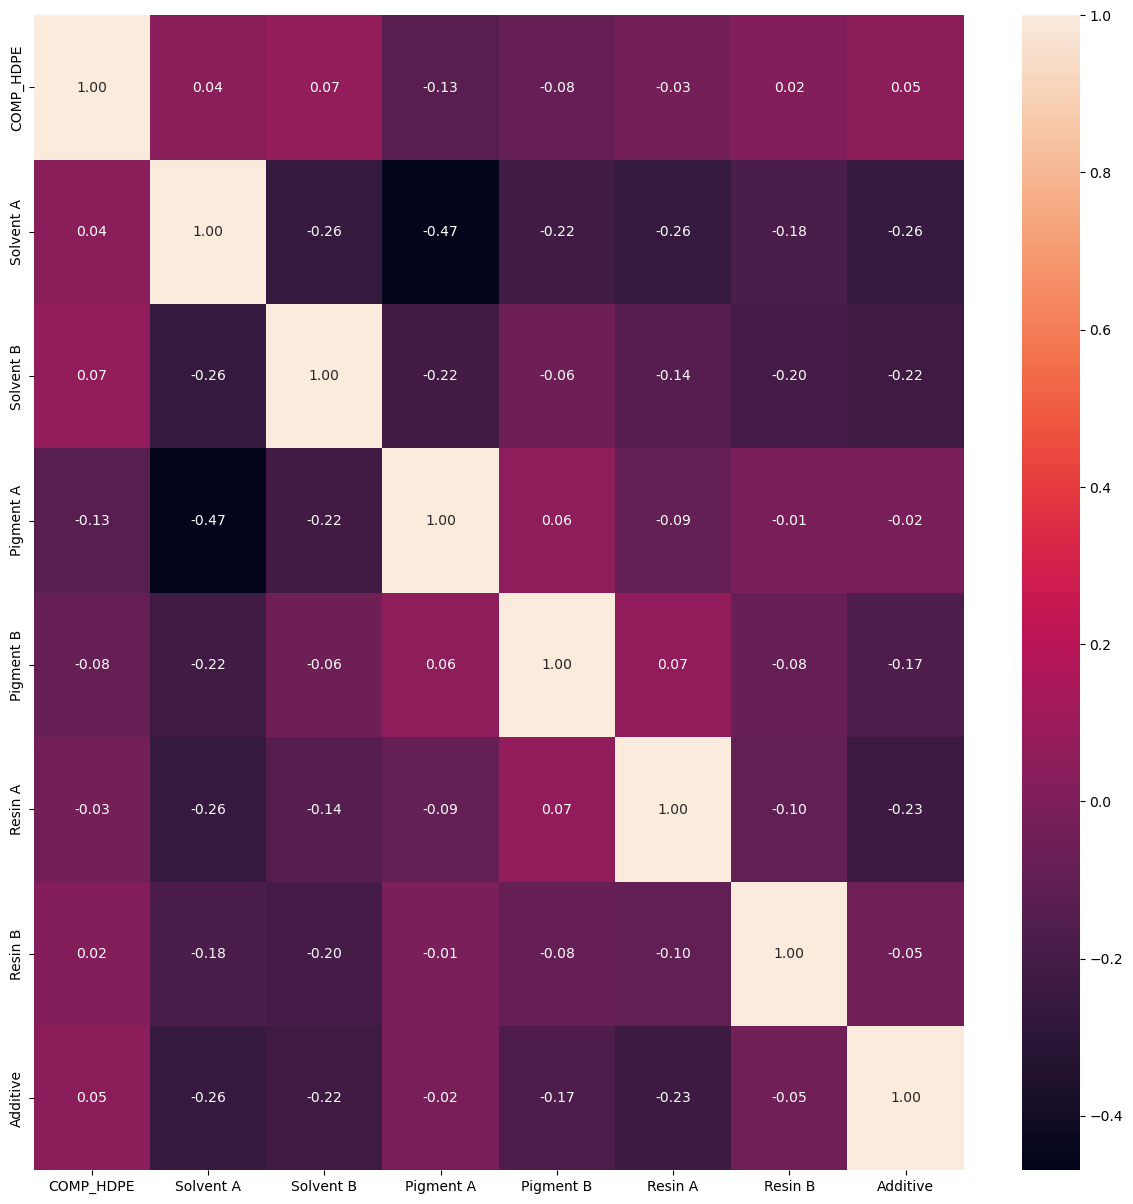

In [219]:
variables_heat = ['COMP_HDPE', 'Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']
plt.figure(figsize=(15, 15))
sns.heatmap(train_HDPE_reduced_augmented[variables_heat].corr(), annot = True, fmt = '.2f');
plt.savefig("Graphs/Heat_aug.jpg")

Como podemos ver, ningún coeficiente de correlación entre la variable objetivo y las de entrada supera el +- 0.15. Podemos determinar que, efectivamente, no hay correlación entre la composición química de la tinta y la compatibilidad química del HDPE. Si el dataset del cual hemos partido fuera real, esta respuesta sería suficiente, pero en nuestro caso hemos creado un dataset de manera artificial usando números aleatorios. Posteriormente se modificaron algunos valores manualmente para dotar de cierta "identidad" a cada tinta, pero el dataset original seguía siendo muy pequeño, ya que queríamos simular el dataset real. Al aplicar data augmentation, no incrementamos ninguna señal porque practicamente no la había, y solo generamos ruido. Y eso es lo que estamos analizando.

Debido a que este dataset no es útil para crear un modelo, vamos a generar un nuevo dataset sintético que contenga patrones y correlaciones significativas.

In [81]:
np.random.seed(42)

n_samples = 1000

solvent_a = np.random.uniform(0, 1, n_samples)
solvent_b = 0.7 * solvent_a + np.random.uniform(0, 0.3, n_samples)
pigment_a = np.random.uniform(0, 1, n_samples)
pigment_b = 0.6 * pigment_a + np.random.uniform(0, 0.4, n_samples)
resin_a = np.random.uniform(0, 1, n_samples)
resin_b = 0.5 * resin_a + np.random.uniform(0, 0.5, n_samples)
additive = np.random.uniform(0, 1, n_samples)

ink_properties = np.array([solvent_a, solvent_b, pigment_a, pigment_b, resin_a, resin_b, additive]).T

# Hemos de normalizar las variables de la composición de la tinta tal que su suma es igual a 1, ya que se trata de concentraciones relativas.
ink_properties_normalized = ink_properties / ink_properties.sum(axis=1, keepdims=True)

# Extraemos los datos normalizados
solvent_a_norm = ink_properties_normalized[:, 0]
solvent_b_norm = ink_properties_normalized[:, 1]
pigment_a_norm = ink_properties_normalized[:, 2]
pigment_b_norm = ink_properties_normalized[:, 3]
resin_a_norm = ink_properties_normalized[:, 4]
resin_b_norm = ink_properties_normalized[:, 5]
additive_norm = ink_properties_normalized[:, 6]

# Generamos los datos de compatibilidad
compatibility_hdpe = (
    2.5 * solvent_a_norm 
    + 1.8 * solvent_b_norm 
    + 1.2 * pigment_a_norm 
    - 1.0 * pigment_b_norm 
    + 1.5 * resin_a_norm 
    - 0.8 * resin_b_norm 
    - 1.3 * additive_norm 
    + np.random.normal(0, 0.5, n_samples)
)

# Normalizamos la compatibilidad para que sea un valor positivo entre 0 y 1
compatibility_hdpe = (compatibility_hdpe - compatibility_hdpe.min()) / (compatibility_hdpe.max() - compatibility_hdpe.min())

# Creamos la columna de Ink_ID
ink_ids = np.arange(1, n_samples + 1)

data = pd.DataFrame({
    'Ink_ID': ink_ids,
    'Solvent A': solvent_a_norm,
    'Solvent B': solvent_b_norm,
    'Pigment A': pigment_a_norm,
    'Pigment B': pigment_b_norm,
    'Resin A': resin_a_norm,
    'Resin B': resin_b_norm,
    'Additive': additive_norm,
    'COMP_HDPE': compatibility_hdpe
})

In [82]:
data.head()

,Ink_ID,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive,COMP_HDPE
0,1,0.121480,0.103050,0.084883,0.138205,0.185524,0.156599,0.210259,0.530202
1,2,0.231324,0.201483,0.060094,0.113595,0.195975,0.155585,0.041944,0.718712
2,3,0.133178,0.140871,0.164882,0.117157,0.138302,0.146888,0.158722,0.364316
3,4,0.206393,0.220207,0.086033,0.137792,0.053058,0.085139,0.211377,0.347066
4,5,0.078523,0.176747,0.136870,0.197224,0.075116,0.256402,0.079119,0.359789


In [83]:
data.tail()

,Ink_ID,Solvent A,Solvent B,Pigment A,Pigment B,Resin A,Resin B,Additive,COMP_HDPE
995,996,0.021898,0.062455,0.206902,0.166427,0.214578,0.189117,0.138622,0.554491
996,997,0.275508,0.279049,0.047236,0.068515,0.035855,0.093497,0.200339,0.512991
997,998,0.050811,0.043251,0.115048,0.127643,0.121753,0.202956,0.338538,0.291091
998,999,0.230615,0.165584,0.070392,0.093680,0.197975,0.157875,0.083879,0.635480
999,1000,0.114541,0.101920,0.223793,0.150852,0.153399,0.095881,0.159613,0.427881


In [84]:
# Vamos a comprobar que la suma de las variables de concentración sea igual a 1 para asegurarnos que los datos tengan sentido físico.
conc_total = data[['Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']].sum(axis=1)
conc_total.describe()

count    1.000000e+03
mean     1.000000e+00
std      1.117975e-16
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

Efectivamente, los datos han sido creados con las limitaciones aplicadas correctamente.

In [85]:
# A continuación vamos a comprobar que todos los valores de la variable 'COMP_HDPE' esten entre 0 y 1.
min_value = data['COMP_HDPE'].min()
max_value = data['COMP_HDPE'].max()

print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

Minimum value: 0.0
Maximum value: 1.0


Acabamos de ver que nuestro nuevo dataframe tiene sentido físico. Ahora solo nos falta comprobar si efectivamente se han generado algunas correlaciones.

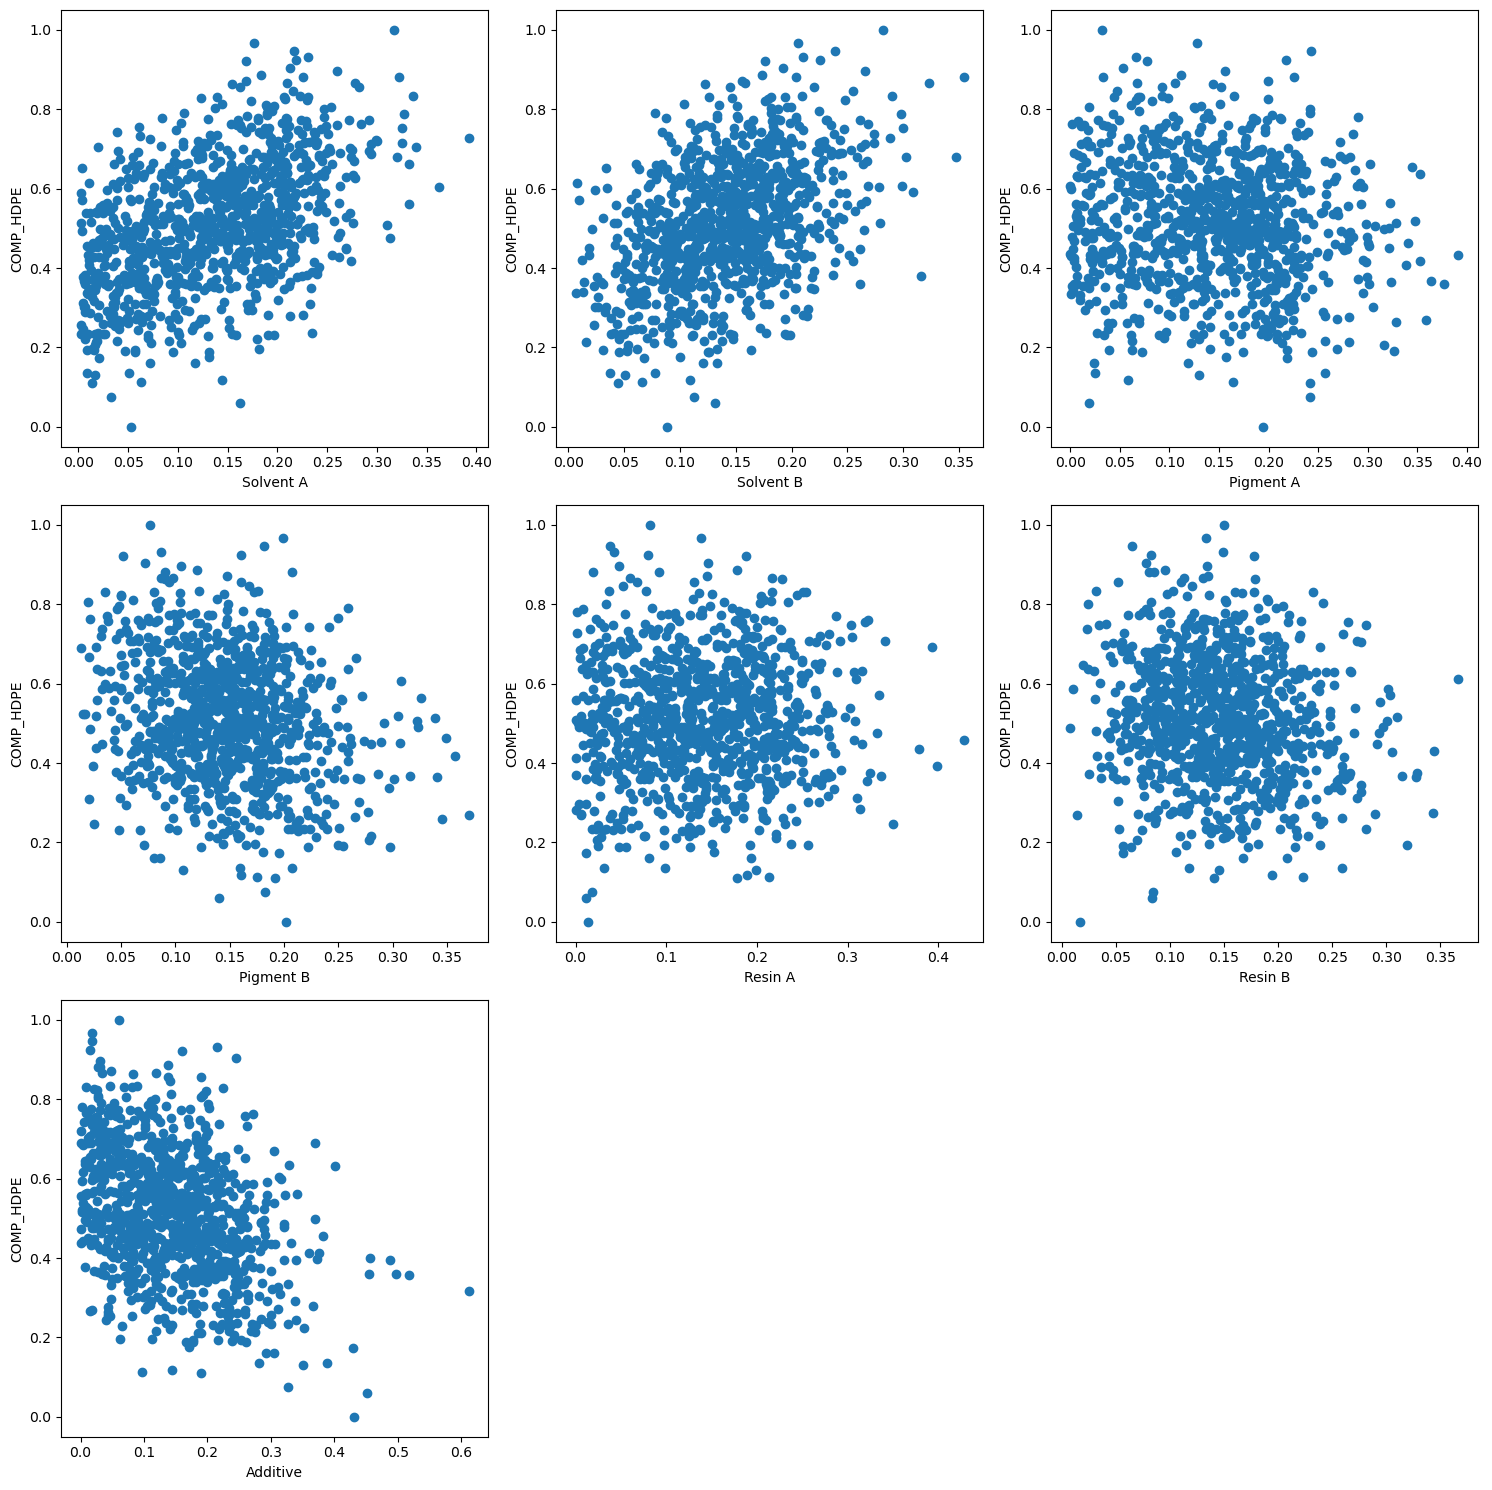

In [220]:
# Volvemos a usar de nuevo el scatter plot
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

variables = ['Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']
for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(data[var], data['COMP_HDPE'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('COMP_HDPE')

for ax in axs.flat:
    if not ax.has_data():
        ax.axis('off')

plt.tight_layout()
plt.savefig("Graphs/Scatter_sint.jpg")
plt.show()

In [ ]:
Ahora sí que podemos apreciar una tendencia en variables como solvent A, solvent B y Additive.

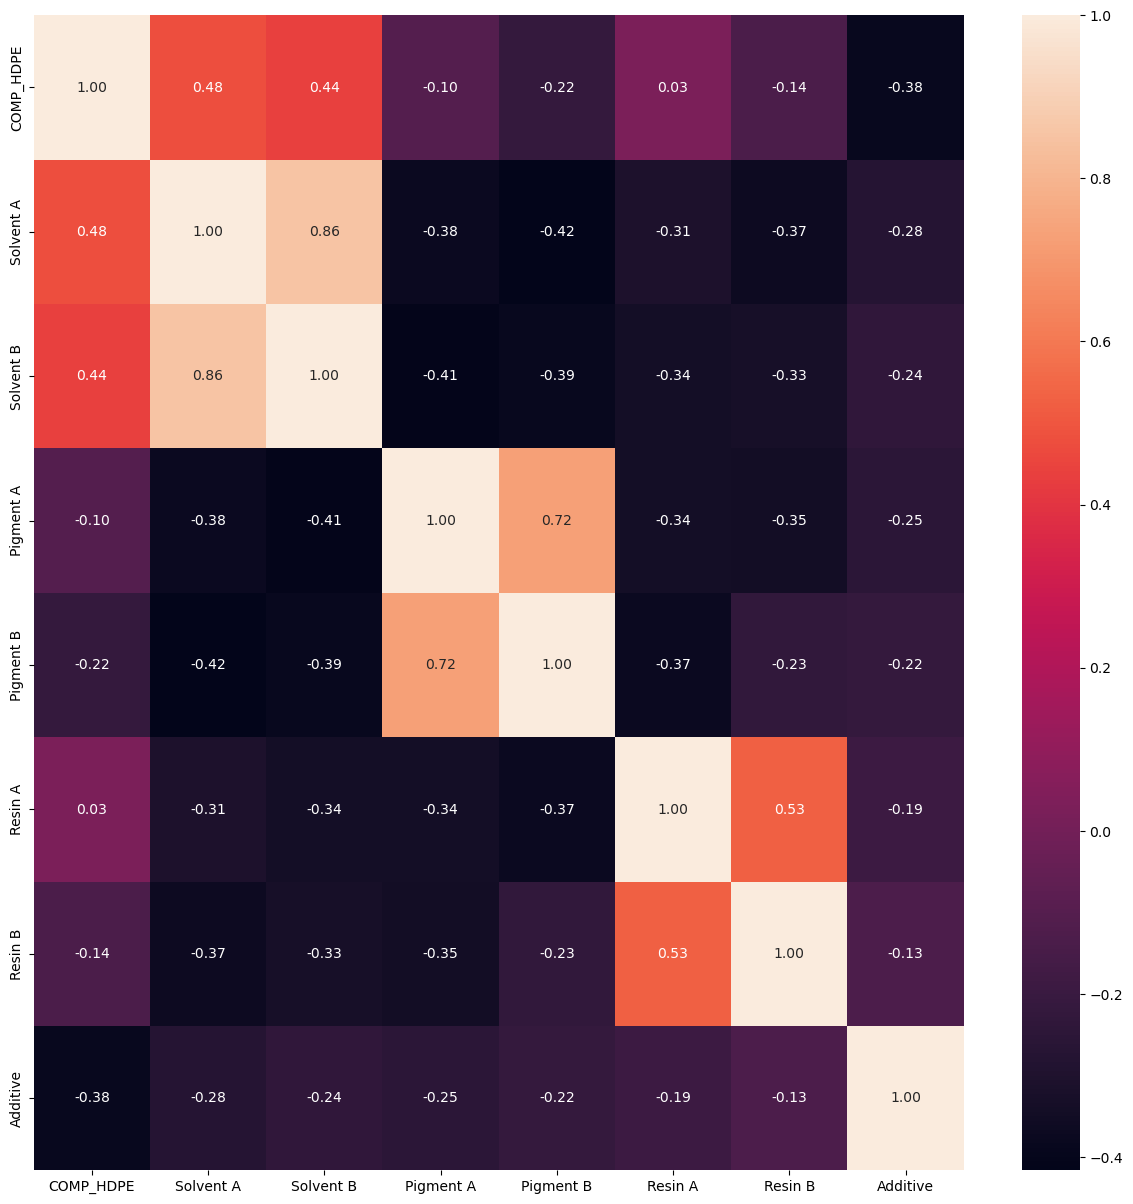

In [221]:
# Volvemos a usar el mapa de calor
variables_heat = ['COMP_HDPE', 'Solvent A', 'Solvent B', 'Pigment A', 'Pigment B', 'Resin A', 'Resin B', 'Additive']
plt.figure(figsize=(15, 15))
sns.heatmap(data[variables_heat].corr(), annot = True, fmt = '.2f');
plt.savefig("Graphs/Heat_sint.jpg")

Confirmamos que la mayor correlación con la variable 'COMP_HDPE' la tiene las variables Solvent A y Solvent B de manera proporcional y Additive de manera inversamente proporcional. Además, estos datos tendrían un sentido físico completo, ya que normalmente los solventes de una tinta juegan el papel más importante en la compatibilidad química y el aditivo podría ser un agente químico añadido para mitigar los efectos de estos solventes, por lo tanto, contra más aditivo, más compatibilidad (menor valor de 'COMP_HDPE').

In [95]:
# Por lo tanto, vamos a seleccionar estas 3 variables como variables de entrada de nuestro modelo y vamos a descartar el resto por tener una correlación muy baja (<0.3).

data_f = data[['COMP_HDPE', 'Solvent A', 'Solvent B', 'Additive']]
data_f.head()

,COMP_HDPE,Solvent A,Solvent B,Additive
0,0.530202,0.121480,0.103050,0.210259
1,0.718712,0.231324,0.201483,0.041944
2,0.364316,0.133178,0.140871,0.158722
3,0.347066,0.206393,0.220207,0.211377
4,0.359789,0.078523,0.176747,0.079119


# Creación del modelo

Aunque sabemos que las correlaciones insertadas en el momento de la creación del modelo son lineales, en un caso real podríamos empezar a plantear el modelo asumiendo que el aumento de la interacción química, por lo tanto de la incompatibilidad, está relacionado linealmente con la concentración del agente químico, lo que no es descabellado, ya que en ciertas condiciones se puede obtener esa dependencia (reacciones químicas de orden 0).

In [102]:
# Empezamos separando las variables de entrada y las de salida
from sklearn.linear_model import LinearRegression

X = data_f.drop('COMP_HDPE', axis=1)
y = data_f['COMP_HDPE']

In [100]:
X.head()

,Solvent A,Solvent B,Additive
0,0.121480,0.103050,0.210259
1,0.231324,0.201483,0.041944
2,0.133178,0.140871,0.158722
3,0.206393,0.220207,0.211377
4,0.078523,0.176747,0.079119


In [101]:
y.head()

0    0.530202
1    0.718712
2    0.364316
3    0.347066
4    0.359789
Name: COMP_HDPE, dtype: float64

In [103]:
# A continuación creamos los subconjuntos de test y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [104]:
# Finalmente entrenamos el modelo
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [107]:
# Mostramos los coeficientes de la regresión lineal
coef = pd.DataFrame(lr.coef_, X.columns, columns=['coef'])
print(coef)

               coef
Solvent A  0.692584
Solvent B  0.256008
Additive  -0.459743


Ya tenemos el modelo creado, solo queda evaluarlo.

# Evaluación del modelo

In [134]:
# Empezamos prediciento valores de salida a partir del subconjunto de test de los datos de entrada (X_test)
y_pred = lr.predict(X_test)

# Ahora vamos a calcular algunas métricas útiles para evaluar nuestro modelo
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("R-squared (test set):", r2_test)
print("Mean Squared Error (test set):", mse_test)
print("Mean Absolute Error (test set):", mae_test)

R-squared (test set): 0.2910863816986259
Mean Squared Error (test set): 0.018409488519691812
Mean Absolute Error (test set): 0.10752041598501316


Vemos que R-squared es solo 0.3, por lo tanto el ajuste de nuestro modelo es bastante pobre. MSE y MAE no son muy altos, pero teniendo en cuenta que nuestros datos de entrada son concentraciones con valores bajos, tampoco son señal de un buen ajuste.

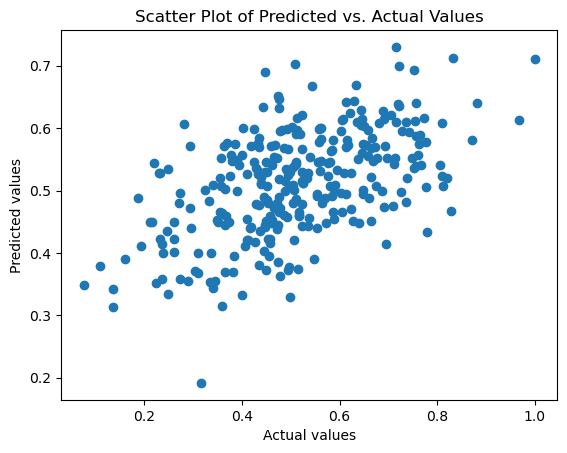

In [222]:
# Veamos la distribución de los valores reales vs los predichos. Si el ajuste es bueno, los valores se tendrían que agrupar en una linea de 45 grados.
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.savefig("Graphs/linear_model.jpg")
plt.show()

Efectivamente, el ajuste no es muy bueno. Vamos a usar otros modelos, descartando los de tipo logistico, ya que sirven para variables de salida categóricas. En este caso usaremos estos 3 modelos no lineales: Decision Tree, Random Forest y Kneighbours.

In [148]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)



DecisionTreeRegressor()

In [176]:
y_pred_dt = dt.predict(X_test)

r2_test_dt = r2_score(y_test, y_pred_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_dt)

print("R-squared (test set):", r2_test_dt)
print("Mean Squared Error (test set):", mse_test_dt)
print("Mean Absolute Error (test set):", mae_test_dt)

R-squared (test set): -0.3353079146222555
Mean Squared Error (test set): 0.03467606643443201
Mean Absolute Error (test set): 0.147249773224892


In [157]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [177]:
y_pred_rf = rf.predict(X_test)

r2_test_rf = r2_score(y_test, y_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_rf)

print("R-squared (test set):", r2_test_rf)
print("Mean Squared Error (test set):", mse_test_rf)
print("Mean Absolute Error (test set):", mae_test_rf)

R-squared (test set): 0.19805860538678555
Mean Squared Error (test set): 0.020825288887766025
Mean Absolute Error (test set): 0.11605248596107116


In [158]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [178]:
y_pred_knn = knn.predict(X_test)

r2_test_knn = r2_score(y_test, y_pred_knn)
mse_test_knn = mean_squared_error(y_test, y_pred_knn)
mae_test_knn = mean_absolute_error(y_test, y_pred_knn)

print("R-squared (test set):", r2_test_knn)
print("Mean Squared Error (test set):", mse_test_knn)
print("Mean Absolute Error (test set):", mae_test_knn)

R-squared (test set): 0.1366589301473361
Mean Squared Error (test set): 0.022419752003232544
Mean Absolute Error (test set): 0.1191353096755914


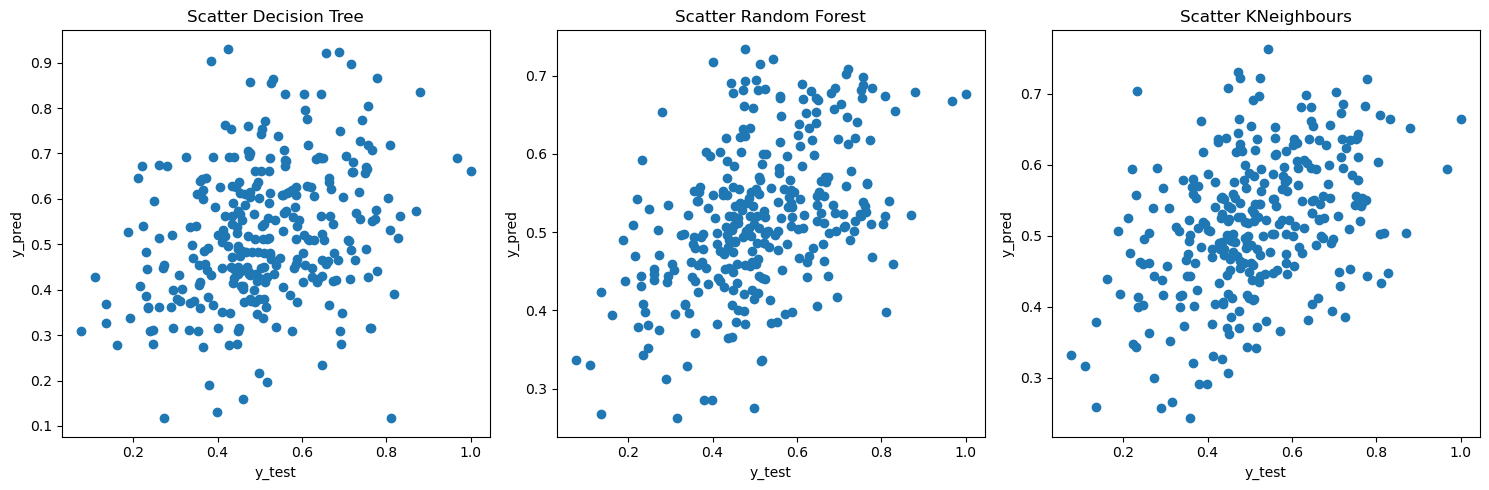

In [223]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(y_test, y_pred_dt)
axs[0].set_title('Scatter Decision Tree')
axs[0].set_xlabel('y_test')
axs[0].set_ylabel('y_pred')

axs[1].scatter(y_test, y_pred_rf)
axs[1].set_title('Scatter Random Forest')
axs[1].set_xlabel('y_test')
axs[1].set_ylabel('y_pred')

axs[2].scatter(y_test, y_pred_knn)
axs[2].set_title('Scatter KNeighbours')
axs[2].set_xlabel('y_test')
axs[2].set_ylabel('y_pred')

plt.tight_layout()
plt.savefig("Graphs/non_linear_models.jpg")
plt.show()

Podemos ver que estos 3 modelos no lineales no solo no se ajustan bien, si no que son aun peores que el modelo original. Aunque hay una infinidad de modelos por probar, debido a la limitación de tiempo y recursos, damos por finalizada nuestra búsqueda de alternativas. Si los datos cons los que hemos trabajado fueran reales, podríamos concluir que la composición química de las tintas no puede usarse para predecir la compatibilidad química del material HDPE. Como los datos que hemos usado eran sintéticos, seguramente la creación del dataframe ha sido, de nuevo, el factor más importante a la hora de determinar la calidad del modelo obtenido. Algoritmos más avanzados tal vez sean capaces de generar datos con correlaciones más marcadas.

In [198]:
# Guardamos los modelos 
from joblib import dump

dump(lr, "models/linear_regression.joblib")
dump(dt, "models/decision_tree.joblib")
dump(rf, "models/random_forest.joblib")
dump(knn, "models/kneighbours.joblib")

['models/kneighbours.joblib']

In [197]:
# Guardamos los 2 datasets generados: el original después de ser augmentado y el que ha sido generado de 0 mediante código.
train_HDPE_reduced_augmented.to_csv("Generated_dataframes/Augmented_data.csv")
data.to_csv("Generated_dataframes/Sintetic_data.csv")